# <center>Project 3 - Supervised Learning and Modeling  

### <center >Kelley Breeze



# Introduction  

In this project we will walk through how to use supervised learning to build models in order to predict responses from our dataset. Before we get started let's go over a little bit about what supervised learning is, what we want to do with our models, and briefly discuss the dataset that we will be using throughout the project.

### Supervised Learning  
In supervised learning you have a response variable that you are trying to predict. If we fit a predictive model using supervised learning it will be possible to evaluate how well our model predicts the value of our response variable by using observations that were not used in fitting our model.

### Absenteeism At Work Dataset  

The dataset that we will use contains information about absenteeism at a courier company in Brazil from July 2007 to July 2010. This dataset is from the UC Irvine Machine Learning Repository and can be found [here](https://archive-beta.ics.uci.edu/dataset/445/absenteeism+at+work). It contains 21 variables that are detailed below:  

1.  `ID` - **Categorical** - Individual Identification - There are 36 unique employees in the dataset. *This variable will be dropped prior to model building*
2.  `Reason for absence` - **Categorical** - This is the recorded reason for the employee's absence. This is a categorical variable with 28 total levels that has been coded numerically. The values 1-21, corresponding to I through XXI, are taken from the World Health Organization's [International Statistical Classification of Diseases and Related Helth Problems 10 Revision](https://icd.who.int/browse10/2010/en#/). The remaining 7 values of this variable are:  
    -  `22` - patient follow-up  
    -  `23` - medical consultaion  
    -  `24` - blood donation  
    -  `25` - laboratory examination  
    -  `26` - unjustified absence  
    -  `27` - phisiotherapy  
    -  `28` - dental consulation  
    
    Note that there are a total of 43 records for which the `Reason for absence` is recorded as `0`. We will simply refer to these as representing a value of `unkonwn` for our `Reason for absence` variable.  
3.  `Month of absence` - **Categorical** - This is the month in which the absence is registered.  
4.  `Day of the week` - **Categorical** - Work day (Monday through Friday) - Categorical - this is coded numerically with the following values:  
    -  `2` - Monday  
    -  `3` - Tuesday  
    -  `4` - Wednesday  
    -  `5` - Thursday  
    -  `6` - Friday  
5.  `Seasons` - **Categorical** - coded numerically with the following values:  
    -  `1` - summer  
    -  `2` - autumn  
    -  `3` - winter  
    -  `4` - spring  
6. `Transportation expense` - **Numeric** -  This is the monthly transportation expense of each employee in dollars
7. `Distance from Residence to Work` - **Numeric** - This is the distance in kilometers that the employee must travel each day to get to work measured in kilometers.    
8. `Service time`  - **Numeric** - the service time of each employee in years.  
9.  `Age` - **Numeric** - Age of employee in years.  
10. `Work load Average/day` - **Numeric** - This is the average workload per day for the employee, units unknown.  
11. `Hit target` - **Numeric** - This is an achievement percentage for periodic goals for each employee.  
12. `Disciplinary failure (yes=1; no=0)` - **Categorical** - Binary yes/no about whether the employee recieved a disciplinary warning that month.   
13. `Education` - **Categorical/Ordinal** - The highest education level attained by the employee, coded numerically with the following values:  
    -  `1` - high school  
    -  `2` - graduate  
    -  `3` - postgraduate  
    -  `4` - master and doctor  
14. `Son` - **Numeric** - The total number of children of the employee.  
15. `Social drinker` - **Categorical** - This is a binary variable where yes = `1` indicates that the employee is a social drinker and no = `0` indicates that the employee is not a social drinker.  
16. `Social smoker`- **Categorical** - This is a binary variable where yes = `1` indicates that the employee is a social smoker and no = `0` indicates that the employee is not a social smoker.    
17. `Pet` - **Numeric** - This is the number of pets owned by the employee.  
18. `Weight` - ***Numeric** - The employee's weight in kilograms.  
19. `Height` - **Numeric** - The employee's height in centimeters.  
20. `Body mass index` - **Numeric** - The employee's body mass index. *This variable will be dropped as it is highly correlated with weight and height*   
21. `Absenteeism time in hours` - **Numeric** - This is our target variable. `Absenteeism time in hours` is a continuous numeric variable representing the number of hours that an employee was absent for a given instance of missed work.  

### Question that we want to answer  

Can we predict the number of hours that an employee will be absent based on the personal and work related information for that employee provided in the dataset?  

### Modeling Goals  

Our goal in working with this dataset is to build and test multiple models to predict the number of absentee hours (variable 21) for an employee based on a subset of the available variables (1-20) listed above. We will use five different modeling techniques to build, train, and test models based on the absenteeism at work dataset. We will then compare our models to one another to determine which model is the best at predicting our response variable. 


## Starting Spark Session and Reading in Our Data  

We will begin by starting our spark session and reading in our data. We will also import `pandas` and `numpy`.

In [1]:
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [2]:
# Reading in the data
absentee_data_pd = pd.read_csv('Absenteeism_at_work.csv', sep = ';')

# Using the head() method to make sure everything looks as expected
absentee_data_pd.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


#### Formatting Column Names  

The original dataset contains variable names with spaces. To make things easier let's replace the spaces in any of the column names with `_` to prevent issues that might arise from the spaces being present in our names. This can easily be done using `str.replace()`.

In [3]:
# Reformatting variable names to replace spaces with _
absentee_data_pd.columns = absentee_data_pd.columns.str.replace(" ", "_")

# Using the head() method to make sure everything looks as expected
absentee_data_pd.head()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


### A Quick Look at the Data  

Before we get into the model building phase, let's take a quick look at our data to see how the variables are stored and looking at some basic statistics about the variables.

In [4]:
absentee_data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason_for_absence               740 non-null    int64  
 2   Month_of_absence                 740 non-null    int64  
 3   Day_of_the_week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation_expense           740 non-null    int64  
 6   Distance_from_Residence_to_Work  740 non-null    int64  
 7   Service_time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work_load_Average/day            740 non-null    float64
 10  Hit_target                       740 non-null    int64  
 11  Disciplinary_failure             740 non-null    int64  
 12  Education             

### Summary Statistics About Our Variables

In [5]:
absentee_data_pd.describe()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


We can see based on the information above that all of the variables are being stored as numberic type, with all except work load average per day being stored as `int64`, work load is stored as `float64`. In reality many of these variables are categorical, and we will want to address this when building our model pipeline. We can also see that our true numeric variables are on very different scales, so we will want to do some standardization before we use these in our linear regression models.

### Converting to Spark SQL Dataframe  

Spark SQL dataframes are the preferred type of dataframe to use when building pipelines in `MLlib`. We will now convert `absentee_data_pd` to a Spark SQL dataframe. We will save this as `absentee_data`. 

In [6]:
absentee_data = spark.createDataFrame(absentee_data_pd)
absentee_data.show(5)

/usr/local/spark/python/pyspark/sql/pandas/conversion.py:474: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():
/usr/local/spark/python/pyspark/sql/pandas/conversion.py:486: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


+---+------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+---+---------------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+
| ID|Reason_for_absence|Month_of_absence|Day_of_the_week|Seasons|Transportation_expense|Distance_from_Residence_to_Work|Service_time|Age|Work_load_Average/day|Hit_target|Disciplinary_failure|Education|Son|Social_drinker|Social_smoker|Pet|Weight|Height|Body_mass_index|Absenteeism_time_in_hours|
+---+------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+---+---------------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+
| 11|                26|               7|              3|      1|                   289|                           

Again, let's take a quick look at the data to make sure everything looks as expected. We can see that all variables are stored as `bigint`, except for the work load variable which is stored as a `double`.

In [7]:
absentee_data

DataFrame[ID: bigint, Reason_for_absence: bigint, Month_of_absence: bigint, Day_of_the_week: bigint, Seasons: bigint, Transportation_expense: bigint, Distance_from_Residence_to_Work: bigint, Service_time: bigint, Age: bigint, Work_load_Average/day: double, Hit_target: bigint, Disciplinary_failure: bigint, Education: bigint, Son: bigint, Social_drinker: bigint, Social_smoker: bigint, Pet: bigint, Weight: bigint, Height: bigint, Body_mass_index: bigint, Absenteeism_time_in_hours: bigint]

Before moving on, let's rename the `Work_load_Average/day` variable to `Workload_per_day` to prevent issues caused by the `/` in the variable name.

In [8]:
absentee_data = absentee_data.withColumnRenamed("Work_load_Average/day", "Workload_per_day")

In [9]:
absentee_data.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
ID,740,18.017567567567568,11.021247263063655,1,36
Reason_for_absence,740,19.216216216216218,8.433405882799654,0,28
Month_of_absence,740,6.324324324324325,3.4362869319125893,0,12
Day_of_the_week,740,3.9148648648648647,1.4216747097562803,2,6
Seasons,740,2.5445945945945945,1.111831060157382,1,4
Transportation_expense,740,221.32972972972973,66.95222324531973,118,388
Distance_from_Residence_to_Work,740,29.63108108108108,14.836788436739145,5,52
Service_time,740,12.554054054054054,4.384873407621149,1,29
Age,740,36.45,6.47877245761187,27,58


# Splitting the Data, Metrics, and Models  

## Model Metrics  

Model metrics are used to determine the quality of the predictions produced by our models. There are many different model metrics that are available to determine how close our predictions are to the actual values of the response variable, but the specific metric selected depends on the type of data you are attempting to make predictions for with your model.  

In this example we are building models that will predict a continuous numeric variable (`Absenteeism time in hours`). Regression models are used when the goal is to predict a continuous response, and all of the models presented in this analysis will be regression models. The most common way to fit a regression model is based on minimizing the sum of squared errors, which can be done with or without including a penalty.  To evaluate the performance of our models we will utilize two of the most commonly used model metrics for regression problems, root mean squared error (RMSE) and mean absolute error (MAE).

### RMSE - Root Mean Squared Error   

RMSE is one of the most popular model metrics used to evaluate regression model performance. When comparing models built on the same target variable and the same dataset, the more accurate the model, the lower the RMSE value produced.  

**RMSE Calculation**  
$$\Large RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2}$$

RMSE is the square root of the mean squared error between the predicted values produced by our model and the actual values of the target variable. This value is calculated by subtracting the predicted value from the actual value of our response variable and then squaring this value. This is then summed up over all of the observations in our dataset, divided by the number of observations, and then taking the square root of that resulting value.  

One big advantage of using RMSE over other possible metrics is that it produces values that are in the same units as our response/target variable, and is therefore fairly easy to understand.   

Potential disadvantages of using RMSE as a model metric are the fact that it can be more sensitive to outliers in the data than other methods and that it will penalize large errors in prediction more than other methods. This is due to the fact that in the RMSE calculation we are squaring the error, meaning that outliers will result in larger prediction errors and will be penalized more heavily than in other methods such as mean absolute error. It is important to note that this sensitivity to outliers can be a benefit depending on the context of the problem at hand. In many cases we may want to minimize occasional large mistakes in our predictions and would want to use a model metric that would penalize outliers more heavily. 

### MAE - Mean Absolute Error  

**MAE Calculation**  
$$\Large MAE = |y_i - \hat{y}_i|$$

The mean absolute error, or MAE, is the average absolute value of the difference between our actual and predicted values for our response variable.  The main advantage of using this as a model metric is that MAE is easy to interpret as the value is on the same scale and in the same units as our response/target variable and is simply the average of the absolute error.  

In contrast to RMSE, MAE does not heavily penalize large outliers. Depending on the situation, this may be appropriate, but it could also be a drawback if you are looking to penalize large outliers. If you want to reduce the impact of outliers in model evaluation, then MAE would be a more appropriate metric than RMSE.


## Splitting the Data into Training and Test Sets   

The goal of creating our supervised models is to be able to successfully predict the number of absentee hours on new data, that is, on data that was not used to train our model. We want our model to be able to generalize to new data. In order to build a model that will be able to generalize we must be careful to not overfit our model to the data used to build it. If we build a model that is perfect at predicting our response variable based on data that was used to build the model, but largely fails to predict our response variable when new data is used to generate predictions, it is clear to see that our model will not be very useful. In any model fitting process there is a balance between fitting the model to the training data and how well that model will perform on new data. This bias/variance tradeoff is illustrated in the diagram below:  

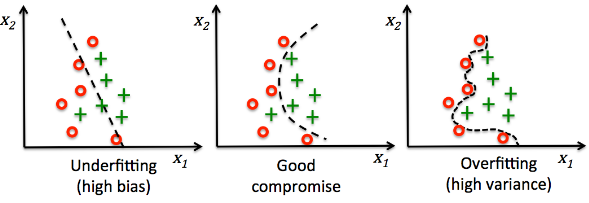

[SOURCE](https://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Bias-variance-Tradeoff.php)

One common way to combat the problem of overfitting our model is to split the data into a training set and a test set. The exact split to use for a training vs test set can vary, but it is common to see an 80/20 or 70/30 training vs test set split. Once the data has been split into training and test sets we can use the training set to fit our model. Often we will want to use model metrics to evaluate the predictions produced by our model based on the observations contained in our training set that were used to fit that model.

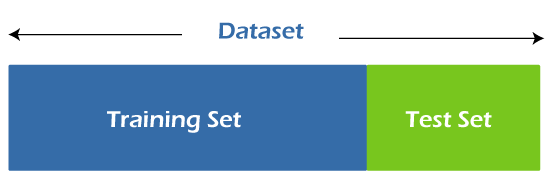
    
[SOURCE](https://www.javatpoint.com/train-and-test-datasets-in-machine-learning)

Now, let's split our data into training and test sets, named simply `train` and `test`.  We can do this by using the `.randomSplit()` method on our spark SQL data frame.  We will use an 80/20 split, sending 80% of the data to the training set, and 20% to the test set. We will print out the counts of each to ensure that the data has been split as expected.  

In [10]:
train, test = absentee_data.randomSplit([0.8,0.2], seed = 1234)
print(train.count(), test.count())

581 159


## Models  

Statistical learning is used for inference, prediction, classification, and pattern finding based on your data. A statistical learning model is a mathematical representation of some phenomenon on which data has been observed and collected. We will build 5 different classes of supervised statistical learning models to predict the value of our response variable, the number of absentee hours. In this section we will briefly discuss the concepts and ideas involved in each of our five classes of models. In the next section, [Model Fitting Using Spark MLlib](#Model-Fitting-Using-Spark-MLlib), we will build and fit our models on the training data set.

### Model 1  - Multiple Linear Regression  

When there is a highly linear relationship between the predictor variables and the response, a linear regression model will work well and will likely outperform other types of models. MLR models are generally fit by minimizing the sum of squared residuals (errors), $y_i - \hat{y}_i$. The general formula can be seen below:

**Minimizing Sums of Squares without Penalty**  

$$\Large \underset{\hat{\beta}'s}{\min} \sum_{i=1}^n (y_{i}-(\hat{\beta}_{0}+\hat{\beta}_{1}x_{1i}+\ldots+\hat{\beta}_{p}x_{pi}))^2$$

This can be extended to include penalty terms as well. When a penalty term is included the model is referred to as a regularized regression or penalized regression model. An $L_1$ penalty ($\alpha\sum_{j=1}^p|\beta_j|$) will shrink and do variable selection through Lasso regression. An $L_2$ penalty ($\lambda \sum_{j=1}^p \beta_j ^2$) is useful for datasets with high collinearity among predictor variables and creates a Ridge regression model. Both penalties can also be combined in the elastic net model seen below:

**Elastic Net Model Showing $L_1$ and $L_2$ Penalties**

$$\Large \underset{\beta's}{\min} \sum_{i=1}^n (y_{i}-(\beta_{0}+\beta_{1}x_{1i}+\ldots+\beta_{p}x_{pi}))^2+\alpha\sum_{j=1}^p|\beta_j|+\lambda \sum_{j=1}^p \beta_j ^2$$

`LinearRegression` from `MLlib` can be used to create a standard linear model without penalty, as well as lasso, ridge regression, and elastic net models depending on the settings of the `regParam` and `elasticNetParam` parameters. The specifics of these will be discussed in the model fitting section.  For model 1 we will use cross validation and a set of tuning parameters to return the best linear regression/regularized regression model. Models under consideration will include standard multiple linear regression as lasso, ridge, and elastic net models.  

The drawbacks of MLR models are that the response can take on any value, including negative numbers, which might not make sense for a given situation. In our data we will be predicting absentee hours, and it is easy to see how a negative prediction for this variable would not be meaningful. 


### Model 2  - Regression Tree  

Regression trees are built on the idea of splitting the predictor space into regions, and then creating different predictions for each region. In this case we are building a regression tree as our goal is to predict a continuous numeric response, the number of absentee hours. Regression trees usually use the mean of observations within a region as the predicted value of the response variable. Regression trees are fit using recursive binary splitting. For every possible value of each predictor, the residual sum of squares is calculated, and the model fitting process tries to minimize this value at each split along the way.

There are many benefits to using regression trees. Regression trees can be displayed graphically and are easily interpreted even by a non-expert. They can also handle qualitative predictors without the need to create dummy variables. Regression trees also have built-in variable selection, and automatically account for interactions between predictor variables, eliminating the need to specify interaction terms when creating the model. An interaction effect implies that the effect of one variable differs depending on the value of another variable. Regression trees split on more than one predictor variable, and as a result there is no need to include interaction terms as this is a fundamental part of the regression tree model building process. It is relatively easy to include categorical predictors, although they must be converted into dummy variables prior to building the model. Additionally, tree based models may outperform linear models when the predictor variables and response have a highly non-linear and complex relationship. 

There are a few big drawbacks when it comes to regression tree models. Regression trees tend to have high variance, meaning that even small changes in the data can vastly change the final tree produced. There is also no optimal algorithm for creating tree models, and as a result these models are built using a greedy algorithm at each split, which is only looking at the best option for the split that it is on at that time. This means that rather than considering what the best possible combination of splits would be, the greedy algorithm determines what the best possible split would be right now. Lastly, tree pruning is often needed to avoid overfitting. Overfitting our model on the training set will lead to decreased performance on the test set. A smaller tree with fewer splits will likely have a lower variance as well as better interpretability. 

### Model 3 - Random Forest  

Random forests are ensemble models that help to reduce the variance of model predictions as compared to a single regression tree model. Random forest models are similar to bagged tree models in that they create multiple trees from bootstrap samples and average the results. The main difference is that random forests do not use all predictors. They instead use a random subset of the predictors for each bootstrap sample/tree fit. When building decision trees using this method each time a split in a tree is considered a random sample of $m$ predictors is chosen from the full set of $p$ predictors. The split is then allowed to use only one of the $m$ predictors. This avoids a problem that can arise if there is a single very strong predictor that exists in your data set. When this occurs every bootstrap tree is likely to use that predictor for its first split, resulting in bagged tree predictions that are more correlated to one another, and thereby giving a smaller reduction in the variance from aggregation. As the goal of ensemble methods is to reduce variance in order to increase prediction success, when there is one strong predictor we will likely want to select a random forest model over a bagged tree model. Additionally, if we have a data set containing a large number of correlated predictors we will see better results with a random forest model that uses a small value of $m$.  




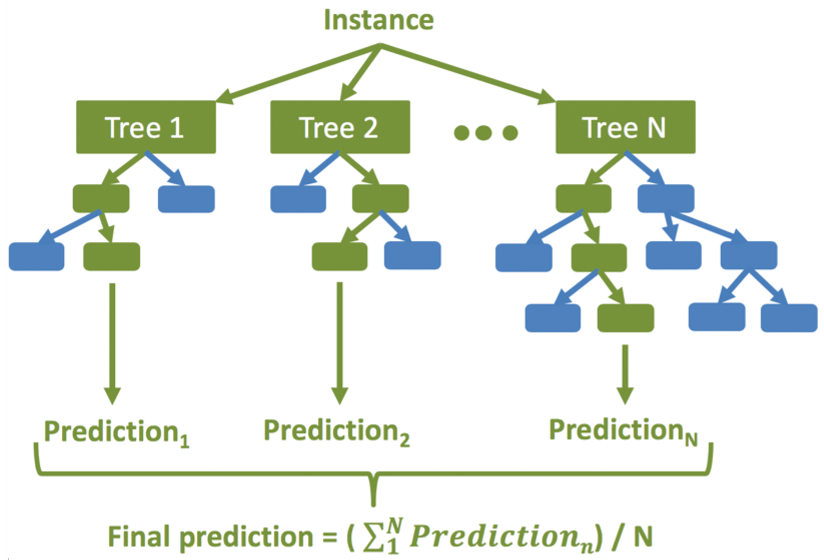


[SOURCE](https://www.researchgate.net/figure/Diagram-of-the-random-forest-machine-learning-method-which-is-an-ensemble-of-regression_fig7_333612054)

Like other ensemble methods, random forests help to improve prediction accuracy at the expense of interpretability. One other drawback of this type of model is that it can be more costly to create, train, and deploy than other methods, like a single regression tree or MLR model.  

### Model 4  - Gradient Boosted Regression Tree   

A gradient boosted regression tree is another ensemble tree based method. In boosting the trees are grown successively, using a slow learning approach based on a loss function and weak learner. The algorithm will work to minimize the loss function. The algorithm begins with the best guess of the response. The gradient is calculated and the model is fit to minimize the loss function. The current model is created and the process continues for the specified iterations, modifying the model with each iteration. The final model is produced after all iterations have been completed.

Boosting is similar to bagging in that many trees are created and then the trees are combined into a single predictive model. In bagging, each tree is built independent of other trees and trees are grown in parallel. In contrast, in a boosted tree model the trees are grown sequentially and each successive tree is built on information gained from the trees that came before it. Like other ensemble methods, boosted regression trees can result in a reduction in variance as compared to a single tree fit.

<center><img src="The-architecture-of-Gradient-Boosting-Decision-Tree.png"/></center>

[SOURCE](https://www.researchgate.net/figure/The-architecture-of-Gradient-Boosting-Decision-Tree_fig2_356698772)

There are several drawbacks to gradient boosted regression tree models. Boosted regression tree models are prone to overfitting with the addition of too many trees, resulting in decreased predictive performance on new data. Also, like other ensemble models, boosted trees can be computationally expensive and take a longer time to train compared to other methods.  

NOTE: In `MLlib` the `GBTRegressor` builds trees successively but also allows the user to limit the number of features available at each split, as is done in the `RandomForestRegressor`. 

### Model 5 - LASSO Regression   
Lasso stands for least angle subset and selection operator, and it is a type of regularized regression model. Fitting a model using lasso is similar to fitting a model using least squares, but a penalty is placed on the sum of the absolute values of the regression coefficients. Lasso regression relies on the tuning parameter $\alpha$, which is a value $>0$. The formula can be seen below:  

**LASSO Regression**  

$$\Large \underset{\beta's}{\min} \sum_{i=1}^n (y_{i}-(\beta_{0}+\beta_{1}x_{1i}+\ldots+\beta_{p}x_{pi}))^2+\alpha\sum_{j=1}^p|\beta_j|$$

Where:  
$p = # predictors$  

So, as the value of $\alpha$ gets larger, it is penalizing having larger values of $\beta$. As a result, it will start to shrink the $\beta$s in our model. Often this results in some of the $\beta$s being set to zero, which will drop these predictor variables out of the model.

The main benefits of lasso regression are that it shrinks the coefficient estimates towards zero and does variable selection automatically. One big drawback of lasso regression is that it can be more difficult to interpret coefficients in the final model as they shrink towards zero.


# Model Fitting Using Spark MLlib and `CrossValidation()`

We will be using cross-validation for model selection and hyperparameter tuning.  

First, let's import the required libraries and functions that we will need to build our models. These will be used in all models, additional libraries or functions that are needed for specific models will be imported as needed within each model section.

In [11]:
from pyspark.ml.feature import SQLTransformer, VectorAssembler, StandardScaler, OneHotEncoder
from pyspark.sql.functions import *
from pyspark.ml import Pipeline
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator

## Transformations and Preprocessing Using `MLlib` Functions  

The transformations in this section will be used in one or more of our model pipelines.

#### `sql_trans_label` Selecting Variables for Modeling and Creating Label Column  

The `sql_trans_label` transformation uses `SQLTransformer()` to create the `label` column in our data set. We will also select only the variables that we want to include when building our models. We will drop the variables below from our dataset:

-  `ID` - This is a personal identifier of each employee. As we are concerned with predicting the number of absentee hours for a given instance, `ID` will not be needed to build our model.  
-  `Body_mass_index` - We will drop this variable as it is a function of height and weight, and is highly correlated with both.  
-  `Month_of_absence` - We will drop this variable because it contains similar information to the `Seasons` variable, with many additional levels as compared to the `Seasons` variable.  

In [12]:
sql_trans_label = SQLTransformer(
    statement = """
                SELECT Reason_for_absence, Day_of_the_week, Seasons, Transportation_expense, Distance_from_Residence_to_Work, Service_time, \
                Age, Workload_per_day, Hit_target, Disciplinary_failure, Education, Son, Social_drinker, Social_smoker, Pet, Weight, \
                Height, Absenteeism_time_in_hours AS label FROM __THIS__
                """
)

Let's just do a quick check that this works as expected. We will use `.toPandas()` to display the data frame as a pandas dataframe. This will not change the `absentee_data` dataframe.

In [13]:
sql_trans_label.transform(absentee_data).columns

['Reason_for_absence',
 'Day_of_the_week',
 'Seasons',
 'Transportation_expense',
 'Distance_from_Residence_to_Work',
 'Service_time',
 'Age',
 'Workload_per_day',
 'Hit_target',
 'Disciplinary_failure',
 'Education',
 'Son',
 'Social_drinker',
 'Social_smoker',
 'Pet',
 'Weight',
 'Height',
 'label']

#### `scale_trans` Standardizing Numeric Variables  

It is important that we standardize our numeric variables before building our models. Some of the predictor variables that we are using have different units and very different scales, such as `Transporation_expense` with a maximum value of `388` compared to `Son` (number of children) with a maximum value of `4`.  The variables the we will standardize are:  

-  `Transportation_expense` - The standardized version will be called `Transportaion_expense_scaled`  
-  `Distance_from_Residence_to_Work` The standardized version will be called `Distance_from_Residence_to_Work_scaled`  
-  `Service_time` The standardized version will be called `Service_time_scaled`  
-  `Age` The standardized version will be called `Age_scaled`  
-  `Workload_per_day` The standardized version will be called `Workload_per_day_scaled`
-  `Hit_target` The standardized version will be called `Hit_target_scaled`  
-  `Son` The standardized version will be called `Son_scaled`  
-  `Pet` The standardized version will be called `Pet_scaled`  
-  `Weight` The standardized version will be called `Weight_scaled`  
-  `Height` The standardized version will be called `Height_scaled`  

*Note that we will add these to our data frame without removing the original variables*  

There are multiple steps involved here, as annotated in the comments within the code below.

In [14]:
# Creating a list of numeric column names that we want to scale
numeric_cols = ['Transportation_expense', 'Distance_from_Residence_to_Work', 'Service_time', 'Age', 'Workload_per_day', \
                'Hit_target', 'Son', 'Pet', 'Weight', 'Height']

# Creating a vector of values for each of our variables above
assembler = [VectorAssembler(inputCols=[col], outputCol=col+'_vec') for col in numeric_cols]

# Using StandardScaler to create scaled versions of our numeric variables
scale = [StandardScaler(inputCol=col+'_vec', outputCol=col+'_scaled', withMean=True, withStd=True) for col in numeric_cols]

# Putting everything together in a pipeline that can be used to scale our data
scale_pipe = Pipeline(stages = assembler + scale)

# Fitting the pipeline on our training data
scale_trans = scale_pipe.fit(train)

# Check how our scaled variables in our train set look
scale_trans.transform(train).toPandas()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Workload_per_day,...,Transportation_expense_scaled,Distance_from_Residence_to_Work_scaled,Service_time_scaled,Age_scaled,Workload_per_day_scaled,Hit_target_scaled,Son_scaled,Pet_scaled,Weight_scaled,Height_scaled
0,1,22,7,2,1,235,11,14,37,239.554,...,[0.1819759583127146],[-1.2713234417741466],[0.30863024031557357],[0.07337951184821305],[-0.7909860178457714],[0.6387630526509107],[0.016412929877780518],[0.1507529537531695],[0.6567778313315372],[0.0008946321330850656]
1,2,18,8,2,1,235,29,12,48,205.917,...,[0.1819759583127146],[-0.05845165249536284],[-0.14190787431595467],[1.7542700502780677],[-1.6225070263874686],[-0.6689231122193513],[0.016412929877780518],[3.0948694623444797],[0.6567778313315372],[-1.5584491758310226]
2,2,18,8,5,1,235,29,12,48,205.917,...,[0.1819759583127146],[-0.05845165249536284],[-0.14190787431595467],[1.7542700502780677],[-1.6225070263874686],[-0.6689231122193513],[0.016412929877780518],[3.0948694623444797],[0.6567778313315372],[-1.5584491758310226]
3,3,11,7,4,1,179,51,18,38,239.554,...,[-0.6502941822077359],[1.423947201067595],[1.20970646957863],[0.22618774261456345],[-0.7909860178457714],[0.6387630526509107],[-0.9371782960212637],[-0.5852761733946581],[0.7345418256261415],[-0.3456262140811611]
4,3,11,8,2,1,179,51,18,38,205.917,...,[-0.6502941822077359],[1.423947201067595],[1.20970646957863],[0.22618774261456345],[-1.6225070263874686],[-0.6689231122193513],[-0.9371782960212637],[-0.5852761733946581],[0.7345418256261415],[-0.3456262140811611]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,36,14,4,5,3,118,13,18,50,246.288,...,[-1.5568741567032267],[-1.1365599096320596],[1.20970646957863],[2.0598865118107685],[-0.6245186613181442],[-0.9304603451934037],[0.016412929877780518],[-0.5852761733946581],[1.4344177742775797],[1.0404571707758237]
577,36,19,6,5,3,118,13,18,50,275.089,...,[-1.5568741567032267],[-1.1365599096320596],[1.20970646957863],[2.0598865118107685],[0.08745436145467776],[0.37722581967685836],[0.016412929877780518],[-0.5852761733946581],[1.4344177742775797],[1.0404571707758237]
578,36,19,6,5,3,118,13,18,50,275.089,...,[-1.5568741567032267],[-1.1365599096320596],[1.20970646957863],[2.0598865118107685],[0.08745436145467776],[0.37722581967685836],[0.016412929877780518],[-0.5852761733946581],[1.4344177742775797],[1.0404571707758237]
579,36,23,4,3,3,118,13,18,50,246.288,...,[-1.5568741567032267],[-1.1365599096320596],[1.20970646957863],[2.0598865118107685],[-0.6245186613181442],[-0.9304603451934037],[0.016412929877780518],[-0.5852761733946581],[1.4344177742775797],[1.0404571707758237]


We will now be able to use `scale_trans` in our model pipeline to scale based on our training dataset.

#### `encoder_trans` Creating Dummy Variables for Categorical Variables in the Dataset  

Before we build our models we want to create dummy variables for the non-binary categorical variables in our dataset. We will use `OneHotEncoder()` from `MLlib` to create these dummy variables for us. We will create dummy variables for:  
-  `Reason_for_absence` - The encoded reason for absence variable will be called `Reason_onehot`    
-  `Day_of_the_week` - The encoded day of the week variable will be called `Day_onehot`  
-  `Seasons` - The encoded seasons variable will be called `Season_onehot`  

*Note that we will add these to our data frame without removing the original variables*

In [15]:
# Create our encoder instance and save as onehot_encoder
onehot_encoder = OneHotEncoder(inputCols=['Reason_for_absence', 'Day_of_the_week', 'Seasons'],
                               outputCols=['Reason_onehot', 'Day_onehot', 'Season_onehot'])

# Fit our encoder instance on our train data frame and save it as encoder_trans to be used in our pipeline
encoder_trans = onehot_encoder.fit(train)

Let's check to make sure that this works as expected.

In [16]:
# Test encoder_model by transforming our train set and save as encoded
encoded = encoder_trans.transform(train)

# Check that everything looks as expected using the action .show()
encoded.show()

+---+------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+---+----------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+---------------+-------------+-------------+
| ID|Reason_for_absence|Month_of_absence|Day_of_the_week|Seasons|Transportation_expense|Distance_from_Residence_to_Work|Service_time|Age|Workload_per_day|Hit_target|Disciplinary_failure|Education|Son|Social_drinker|Social_smoker|Pet|Weight|Height|Body_mass_index|Absenteeism_time_in_hours|  Reason_onehot|   Day_onehot|Season_onehot|
+---+------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+---+----------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+---------------+-------------+-------------

#### Vector Assemblers  

##### `features_Assembler`  

The `vectorAssembler` will create a features vector containing all predictor variables that we want to use in our linear models that will use scaled data in addition to the one hot encoded variables and a couple of unchanged variables from our dataset. We will call this vector assembler `features_Assembler`. We need to pass these variable names as a list. To easily grab the columns we want we can use the `.columns` attribute on our spark SQL data frames to return a list of column names. We can then copy and paste the variables we want to include in our `features` column. We will include the variables: 

`Transportation_expense_scaled`, `Distance_from_Residence_to_Work_scaled`, `Service_time_scaled`, `Age_scaled`, `Workload_per_day_scaled`, `Hit_target_scaled`, `Son_scaled`, `Pet_scaled`, `Weight_scaled`, `Height_scaled`, `Reason_onehot`, `Day_onehot`, `Season_onehot`, `Disciplinary_failure`, `Education`, `Social_drinker`, and`Social_smoker`.


In [17]:
print(scale_trans.transform(absentee_data).columns)

['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week', 'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work', 'Service_time', 'Age', 'Workload_per_day', 'Hit_target', 'Disciplinary_failure', 'Education', 'Son', 'Social_drinker', 'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index', 'Absenteeism_time_in_hours', 'Transportation_expense_vec', 'Distance_from_Residence_to_Work_vec', 'Service_time_vec', 'Age_vec', 'Workload_per_day_vec', 'Hit_target_vec', 'Son_vec', 'Pet_vec', 'Weight_vec', 'Height_vec', 'Transportation_expense_scaled', 'Distance_from_Residence_to_Work_scaled', 'Service_time_scaled', 'Age_scaled', 'Workload_per_day_scaled', 'Hit_target_scaled', 'Son_scaled', 'Pet_scaled', 'Weight_scaled', 'Height_scaled']


In [18]:
print(encoded.columns)

['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week', 'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work', 'Service_time', 'Age', 'Workload_per_day', 'Hit_target', 'Disciplinary_failure', 'Education', 'Son', 'Social_drinker', 'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index', 'Absenteeism_time_in_hours', 'Reason_onehot', 'Day_onehot', 'Season_onehot']


In [19]:
absentee_data.columns

['ID',
 'Reason_for_absence',
 'Month_of_absence',
 'Day_of_the_week',
 'Seasons',
 'Transportation_expense',
 'Distance_from_Residence_to_Work',
 'Service_time',
 'Age',
 'Workload_per_day',
 'Hit_target',
 'Disciplinary_failure',
 'Education',
 'Son',
 'Social_drinker',
 'Social_smoker',
 'Pet',
 'Weight',
 'Height',
 'Body_mass_index',
 'Absenteeism_time_in_hours']

In [20]:
features_Assembler = VectorAssembler(inputCols = ['Transportation_expense_scaled', 'Distance_from_Residence_to_Work_scaled', 'Service_time_scaled', \
                                                        'Age_scaled', 'Workload_per_day_scaled', 'Hit_target_scaled', 'Son_scaled', 'Pet_scaled', \
                                                        'Weight_scaled', 'Height_scaled', 'Reason_onehot', 'Day_onehot', 'Season_onehot',  \
                                                        'Disciplinary_failure', 'Education', 'Social_drinker', 'Social_smoker'], 
                                  outputCol = 'features')

##### `tree_features_Assembler`  

We will create a separate vector assembler to use with our tree models called `tree_features_assembler` and include the factors: 

`Transportation_expense`, `Distance_from_Residence_to_Work`, `Service_time`, `Age`, `Workload_per_day`, `Hit_target`, `Disciplinary_failure`, `Education`, `Son`, `Social_drinker`, `Social_smoker`, `Pet`, `Weight`, `Height`, `Reason_onehot`, `Day_onehot`, `Season_onehot`

In [21]:
tree_features_Assembler = VectorAssembler(inputCols = ['Reason_onehot', 'Day_onehot', 'Season_onehot', 'Transportation_expense', \
                                                       'Distance_from_Residence_to_Work', 'Service_time', 'Age', 'Workload_per_day', \
                                                       'Hit_target', 'Disciplinary_failure', 'Education', 'Son', 'Social_drinker', \
                                                       'Social_smoker', 'Pet', 'Weight', 'Height'], 
                                  outputCol = 'features')

## Cross-Validation  

We will be using 5 fold cross-validation for model selection and hyperparameter tuning. In 5 fold cross-validation the data is split into 5 folds, or groups. Then, we train the model on the first 4 folds, test on the 5th fold, and find the sum of the loss function that we are using (like RMSE). We then move on and train our model on folds 1, 2, 3 and 5 and test on the 4th fold, again finding the sum of the loss function for this round. We continue until each of our folds has been used as the test set. Then we can find the CV error by summing all the test errors from above. The main idea for k fold cross-validation is that for each round we essentially have a mini train vs test set, where the loss function is based on the results from the “test” set that was not used to train the model for that round.  

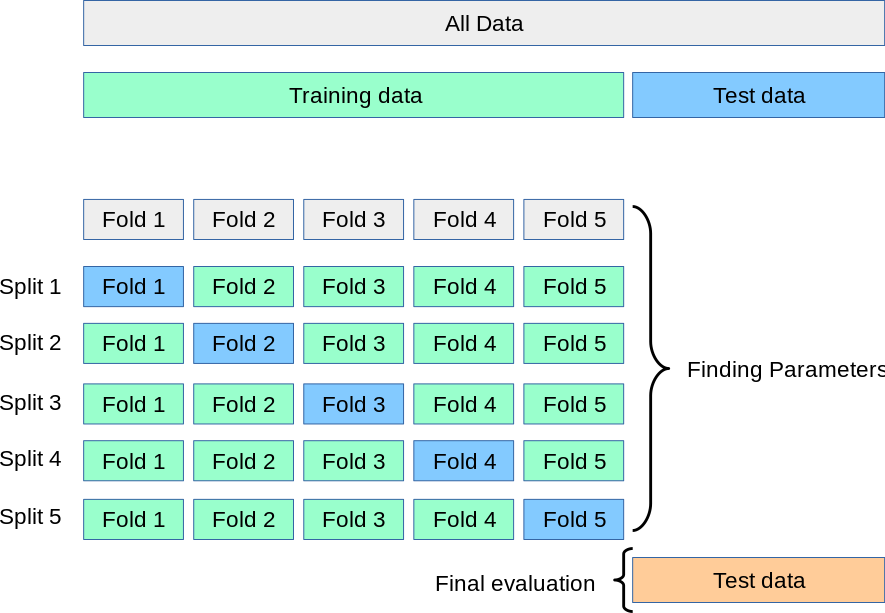

[SOURCE](https://scikit-learn.org/stable/modules/cross_validation.html)

We will use `CrossValidator()` from `pyspark.ml.tuning` to select the optimal parameter values for our models. `CrossValidator()` only allows for a single `evaluator` at a time. As we want to select optimal parameters based on RMSE and MAE we will have to fit two cross-validators per model type and compare the results. For each of our model classes, we will evaluate optimal parameters first based on RMSE, and then based on MAE. If the two metrics disagree on the model type to select for a given class of model more discussion or investigation may be needed to determine which model should be used to move on to predictions on our test set.

### Model 1  - Multiple Linear Regression  

We will use `LinearRegression()` from `pyspark.ml.regression` for our MLR model. In linear regression, adding a penalty term to the loss function is called penalized regression or regularized regression. We will evaluate models for a range of possible penalty terms including least squares estimates without penalty, with an $L_1$ ($\alpha$) penalty (LASSO), with an $L_2$ ($\lambda$) penalty (Ridge Regression), and with a combination of both $L_1$ and $L_2$ penalty types (Elastic Net).

The parameters available in `LinearRegression()` allow for various types of regularization. The `regParam` represents the $\lambda$ in the penalty part of the loss function. If $\lambda$ is set to `0` the penalty term $L_2$ will have no effect.   

The `elasticNetParam` is the elastic net mixing parameter and has a range of 0 to 1. If this parameter is set to `1`, the resulting model is equivalent to a Lasso model with an $L_1$ penalty. If the `elasticNetParam` is set to `0`, the resulting model produced is a ridge regression model with an $L_2$ penalty. If both `regParam` and `elasticNetParam` are set to `0`, the resulting model will not contain a penalty term, and will be created based on the least squares estimates only.

The series of transformations that we will use in our MLR pipeline are:  

1. `sql_trans_label` - To select the columns of interest from our original data frame and to create our `label` column for our target variable, `Absenteeism_time_in_hours`.  
2.  `scale_trans` - To standardize our numeric columns.  
3.  `encoder_trans` To create one hot encoded versions of our categorical variables.  
4.  `features_Assembler` To put all of our desired predictor variables into our `features` vector.  
5.  `mlr_regressor` To create our MLR model.  

In [22]:
# Importing LinearRegression
from pyspark.ml.regression import LinearRegression

In [23]:
# Creating mlr regressor instance for pipeline
mlr_regressor = LinearRegression(featuresCol = 'features', labelCol='label')

In [24]:
# Creating mlr pipeline 
mlr_pipeline = Pipeline(stages = [sql_trans_label, scale_trans, encoder_trans, features_Assembler, mlr_regressor])

### Cross-Validation and Hyperparameter Tuning   

We can use `ParamGridBuilder()` to create a grid of all possible values of our parameters that we would like to consider for our model. Here we will select five values for `regParam` and five values for `elasticNetParam`. By including a possible value of `0` for both parameters as well as a possible value of `1` for the `elasticNetParam` we are able to include a non-penalized MLR model, a Lasso model, a Ridge regression model, and an elastic net model as possible models to be chosen in cross-validation in combination with the `regParam` values. Note that each additional value included for a parameter when building the param grid will increase the computational time during cross-validation.  

In [25]:
# Creating mlr param grid for cross validation
mlr_paramGrid = ParamGridBuilder() \
    .addGrid(mlr_regressor.regParam, [0, 0.01, 0.1, 1.0, 10.0]) \
    .addGrid(mlr_regressor.elasticNetParam, [0.0, 0.2, 0.5, 0.7, 1.0]) \
    .build()

#### Cross Validation Using RMSE  

Next, we will create our MLR crossvalidator, `mlr_crossval`, using the `mlr_pipeline`, `mlr_paramgrid`, and using RMSE as our metric.  

In [26]:
# Creating mlr crossvalidator using the mlr_pipleline, mlr_paramgrid, and using RMSE as our metric
mlr_crossval = CrossValidator(estimator = mlr_pipeline,
                              estimatorParamMaps = mlr_paramGrid,
                              evaluator = RegressionEvaluator(metricName='rmse'),
                              numFolds=5,
                              seed = 1234)

We can now fit our model on our `train` data set using `mlr_crossval`. This will automatically select the optimal values for our `regParam` and `elasticNetParam` parameters. We will save this as `mlr_cv_model`. This will allow us to then see the parameters selected by cross validation using RMSE. 

In [27]:
# Fitting model using the mlr cross validator that we created
mlr_cv_model = mlr_crossval.fit(train)

In [28]:
# MLR model stats
best_mlr_Pipeline = mlr_cv_model.bestModel
best_mlr_Model = best_mlr_Pipeline.stages[4]
print(best_mlr_Model.explainParam('regParam'))
print(best_mlr_Model.explainParam('elasticNetParam'))
print(best_mlr_Model.coefficients)

regParam: regularization parameter (>= 0). (default: 0.0, current: 10.0)
elasticNetParam: the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty. (default: 0.0, current: 0.0)
[0.22677380411425374,-0.6254652539348092,-0.0159725373198707,0.24793320679231476,-0.15002026669437632,0.32419134027951324,0.8118695890234615,-0.33417633062839713,-0.06849474448941958,0.8702697889471593,-2.657495662444544,3.71094588203646,9.655008294267665,0.716702542210664,0.26688118102923386,-1.438637790992719,-0.08419063550457198,3.5350050397497665,-1.121249118850272,20.831941780091537,2.402572196174129,2.779815412863692,10.305868007015134,5.760164243153687,2.3388091160929783,-1.109096253060802,-3.186659236689779,1.4147473249335898,0.3175929729162821,8.204818826352563,0.0,-0.25314399328820825,0.67077058535416,-1.947262730852867,0.15712024147774584,-1.81265781401036,-0.08791012029731454,-1.3312181407370605,0.0,0.0,1.3110492718409235,0.2977

#### Cross Validation Using MAE  

Next, we will run cross validation using MAE as our metric and see if both cross validators return the same model, or if different models were selected.

In [29]:
# Creating mlr mae crossvalidator using the mlr_pipleline, mlr_paramgrid, and using RMSE as our metric
mlr_mae_crossval = CrossValidator(estimator = mlr_pipeline,
                                  estimatorParamMaps = mlr_paramGrid,
                                  evaluator = RegressionEvaluator(metricName='mae'),
                                  numFolds=5,
                                  seed = 1234)

In [30]:
# Fitting model using the mlr mae cross validator that we created
mlr_mae_cv_model = mlr_mae_crossval.fit(train)

In [31]:
# MLR mae model params
best_mlr_mae_Pipeline = mlr_mae_cv_model.bestModel
best_mlr_mae_Model = best_mlr_mae_Pipeline.stages[4]
print(best_mlr_mae_Model.explainParam('elasticNetParam'))
print(best_mlr_mae_Model.explainParam('regParam'))
print(best_mlr_mae_Model.coefficients)

elasticNetParam: the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty. (default: 0.0, current: 0.0)
regParam: regularization parameter (>= 0). (default: 0.0, current: 10.0)
[0.22677380411425374,-0.6254652539348092,-0.0159725373198707,0.24793320679231476,-0.15002026669437632,0.32419134027951324,0.8118695890234615,-0.33417633062839713,-0.06849474448941958,0.8702697889471593,-2.657495662444544,3.71094588203646,9.655008294267665,0.716702542210664,0.26688118102923386,-1.438637790992719,-0.08419063550457198,3.5350050397497665,-1.121249118850272,20.831941780091537,2.402572196174129,2.779815412863692,10.305868007015134,5.760164243153687,2.3388091160929783,-1.109096253060802,-3.186659236689779,1.4147473249335898,0.3175929729162821,8.204818826352563,0.0,-0.25314399328820825,0.67077058535416,-1.947262730852867,0.15712024147774584,-1.81265781401036,-0.08791012029731454,-1.3312181407370605,0.0,0.0,1.3110492718409235,0.2977

#### Cross Validation Selected Model Parameters     

Using RMSE and MAE in cross-validation ended up selecting the same model, with a value of `0` for the `elasticNetParam` and a value of `10` for the `regParam`. Note that since `0` was selected as the optimal value for the `elasticNetParam` the selected model is a **ridge regression model**, with a penalty of `10`.

#### Evaluating CV Selected Model on Training Set  

`LinearRegression` in `MLlib` makes it easy to find the training RMSE and MAE values when we use this in cross validation. The fitted linear regression model has an attribute, `summary` that will allow you to easily access statistics on residuals, MSE and r-squared values for your fitted model. We will use this to print our values for RMSE and MAE for our training set.  

In [32]:
print(f"Best MLR (Ridge Regression) Training RMSE: {best_mlr_Model.summary.rootMeanSquaredError}")
print(f"Best MLR (Ridge Regression) Training MAE: {best_mlr_Model.summary.meanAbsoluteError}")

Best MLR (Ridge Regression) Training RMSE: 11.923348668556025
Best MLR (Ridge Regression) Training MAE: 5.102668265393184


### Model 2  - Regression Tree  

One benefit of regression trees is that there is not a need to scale the predictors in the model. As a result, we do not need to include this transformation in our regression tree pipeline. We still want to use our onehot encoder transformation to create dummy variables for the categorical variables in our model. We will use the `tree_features_Assembler` that we created above to create our features vector for our regression trees. We will be using `DecisionTreeRegressor` from `MLLib` for our model fitting.  

**Model Parameters**  

We will be finding optimal values for the `maxDepth` and `minInstancesPerNode` parameters using the `ParamGridBuilder()` and cross validation.  

-  `maxDepth` - The `maxDepth` parameter represents the maximum depth of the tree.  
    - Valid range of values is from 0 to 30.    
    - Default value: `5`  
    
-  `minInstancesPerNode` - Minimum number of instances each child must have after split. If a split causes the left or right child to have fewer than minInstancesPerNode, the split will be discarded as invalid.  
    - Valid range of values is greater than or equal to 1.  
    - Default value: `1`  

In [33]:
from pyspark.ml.regression import DecisionTreeRegressor

In [34]:
# Creating regression tree regressor instance for pipeline
single_tree_regressor = DecisionTreeRegressor(featuresCol = 'features', labelCol='label')

In [35]:
# Creating single regression tree pipeline 
single_tree_pipeline = Pipeline(stages = [sql_trans_label, encoder_trans, tree_features_Assembler, single_tree_regressor])

In [36]:
# Creating single regression tree param grid for cross-validation
single_tree_paramGrid = ParamGridBuilder() \
    .addGrid(single_tree_regressor.maxDepth, [5, 10, 15, 20, 25, 30]) \
    .addGrid(single_tree_regressor.minInstancesPerNode, [3, 5, 10, 50, 100]) \
    .build()

#### Cross-Validation Using RMSE

In [37]:
# Creating single regression tree crossvalidator using the single_tree_pipleline, single_tree_paramgrid, and using RMSE as our metric
single_tree_crossval = CrossValidator(estimator = single_tree_pipeline,
                                      estimatorParamMaps = single_tree_paramGrid,
                                      evaluator = RegressionEvaluator(metricName='rmse'),
                                      numFolds=5,
                                      seed = 1234)

In [38]:
# Fitting model using the single tree cross validator that we created
single_tree_cv_model = single_tree_crossval.fit(train)

In [39]:
# Single Regression Tree model stats
best_single_tree_Pipeline = single_tree_cv_model.bestModel
best_single_tree_Model = best_single_tree_Pipeline.stages[3]
print(best_single_tree_Model.explainParam('maxDepth'))
print(best_single_tree_Model.explainParam('minInstancesPerNode'))

maxDepth: Maximum depth of the tree. (>= 0) E.g., depth 0 means 1 leaf node; depth 1 means 1 internal node + 2 leaf nodes. Must be in range [0, 30]. (default: 5, current: 5)
minInstancesPerNode: Minimum number of instances each child must have after split. If a split causes the left or right child to have fewer than minInstancesPerNode, the split will be discarded as invalid. Should be >= 1. (default: 1, current: 10)


#### Cross-Validation Using MAE

In [40]:
# Creating single regression tree mae crossvalidator using the single_tree_pipleline, single_tree_paramgrid, and using RMSE as our metric
single_tree_mae_crossval = CrossValidator(estimator = single_tree_pipeline,
                                          estimatorParamMaps = single_tree_paramGrid,
                                          evaluator = RegressionEvaluator(metricName='mae'),
                                          numFolds=5,
                                          seed = 1234)

In [41]:
# Fitting model using the single tree mae cross validator that we created
single_tree_mae_cv_model = single_tree_mae_crossval.fit(train)

In [42]:
# Single Regression Tree mae model stats
best_single_tree_mae_Pipeline = single_tree_mae_cv_model.bestModel
best_single_tree_mae_Model = best_single_tree_mae_Pipeline.stages[3]
print(best_single_tree_mae_Model.explainParam('maxDepth'))
print(best_single_tree_mae_Model.explainParam('minInstancesPerNode'))

maxDepth: Maximum depth of the tree. (>= 0) E.g., depth 0 means 1 leaf node; depth 1 means 1 internal node + 2 leaf nodes. Must be in range [0, 30]. (default: 5, current: 15)
minInstancesPerNode: Minimum number of instances each child must have after split. If a split causes the left or right child to have fewer than minInstancesPerNode, the split will be discarded as invalid. Should be >= 1. (default: 1, current: 3)


#### Cross-Validation Selected Model Parameters  

Cross-validation using RMSE selected a decision tree model with `5` for `maxDepth` and `10` for `minInstancesPerNode`. Cross validation using MAE selected a decision tree model with `15` for `maxDepth` and `3` for `minInstancesPerNode`. We can use `.toDebugString` to get a full description of each model. This will allow us to compare the complexity of the model created using RMSE to the model created using MAE. We want to avoid overfitting our model on our training data, as this generally reduces the model's performance on data that was not used to train the model.

In [43]:
print(f'\nRMSE CV regression tree model selected:\n\n{best_single_tree_Model.toDebugString}')


RMSE CV regression tree model selected:

DecisionTreeRegressionModel: uid=DecisionTreeRegressor_33284c8343f6, depth=5, numNodes=21, numFeatures=52
  If (feature 19 in {0.0})
   If (feature 13 in {0.0})
    If (feature 51 <= 190.5)
     If (feature 0 in {1.0})
      Predict: 0.0
     Else (feature 0 not in {1.0})
      If (feature 40 <= 16.5)
       Predict: 6.1454545454545455
      Else (feature 40 > 16.5)
       Predict: 3.025
    Else (feature 51 > 190.5)
     Predict: 14.764705882352942
   Else (feature 13 not in {0.0})
    If (feature 39 <= 18.5)
     Predict: 33.27272727272727
    Else (feature 39 > 18.5)
     If (feature 47 <= 0.5)
      Predict: 3.2
     Else (feature 47 > 0.5)
      If (feature 38 <= 240.5)
       Predict: 11.5
      Else (feature 38 > 240.5)
       Predict: 18.75
  Else (feature 19 not in {0.0})
   If (feature 49 <= 1.5)
    If (feature 43 <= 96.5)
     Predict: 15.0
    Else (feature 43 > 96.5)
     Predict: 40.0
   Else (feature 49 > 1.5)
    Predict: 6.9



In [44]:
print(f'\nMAE CV regression tree model selected:\n\n{best_single_tree_mae_Model.toDebugString}')


MAE CV regression tree model selected:

DecisionTreeRegressionModel: uid=DecisionTreeRegressor_33284c8343f6, depth=15, numNodes=143, numFeatures=52
  If (feature 19 in {0.0})
   If (feature 9 in {0.0})
    If (feature 13 in {0.0})
     If (feature 12 in {0.0})
      If (feature 51 <= 190.5)
       If (feature 1 in {0.0})
        If (feature 0 in {1.0})
         Predict: 0.0
        Else (feature 0 not in {1.0})
         If (feature 38 <= 264.0)
          If (feature 26 in {0.0})
           If (feature 22 in {0.0})
            If (feature 10 in {0.0})
             If (feature 18 in {0.0})
              If (feature 11 in {0.0})
               If (feature 6 in {0.0})
                If (feature 14 in {0.0})
                 Predict: 2.819277108433735
                Else (feature 14 not in {0.0})
                 Predict: 5.142857142857143
               Else (feature 6 not in {0.0})
                Predict: 6.75
              Else (feature 11 not in {0.0})
               If (feature 41 

When we look at the full model descriptions we can see that the model selected via mean absolute error is much more complex than what was selected using RMSE. To avoid overfitting our single regression tree model to our training set, we will use the model selected using RMSE during cross validation.

#### Evaluating CV Selected Model on Training Set  

Unfortunately, the `DecisionTreeRegerssionModel` in `MLlib` does not have the `summary` attribute, so we need a few steps to print the RMSE and MAE for our training set. We will use `RegressionEvaluator` to help get these values. First, we will use `single_tree_cv_model.transform(train)` to create predictions based on our training set.

In [45]:
srt_train = single_tree_cv_model.transform(train)

Let's take a quick look at the predictions made.

In [46]:
srt_train.toPandas()

,Reason_for_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Workload_per_day,Hit_target,Disciplinary_failure,...,Social_smoker,Pet,Weight,Height,label,Reason_onehot,Day_onehot,Season_onehot,features,prediction
0,22,2,1,235,11,14,37,239.554,97,0,...,0,1,88,172,8,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 1.0, 0.0, 0.0, 0.0)","(0.0, 1.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",6.145455
1,18,2,1,235,29,12,48,205.917,92,0,...,1,5,88,163,8,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 1.0, 0.0, 0.0, 0.0)","(0.0, 1.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",6.145455
2,18,5,1,235,29,12,48,205.917,92,0,...,1,5,88,163,8,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 1.0)","(0.0, 1.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",6.145455
3,11,4,1,179,51,18,38,239.554,97,0,...,0,0,89,170,1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 1.0, 0.0)","(0.0, 1.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3.025000
4,11,2,1,179,51,18,38,205.917,92,0,...,0,0,89,170,1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 1.0, 0.0, 0.0, 0.0)","(0.0, 1.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3.025000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,14,5,3,118,13,18,50,246.288,91,0,...,0,0,98,178,2,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 1.0)","(0.0, 0.0, 0.0, 1.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3.025000
577,19,5,3,118,13,18,50,275.089,96,0,...,0,0,98,178,3,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 1.0)","(0.0, 0.0, 0.0, 1.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15.000000
578,19,5,3,118,13,18,50,275.089,96,0,...,0,0,98,178,24,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 1.0)","(0.0, 0.0, 0.0, 1.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15.000000
579,23,3,3,118,13,18,50,246.288,91,0,...,0,0,98,178,3,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 1.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 1.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3.025000


#### Using `RegressionEvaluator()` On Training Set  

We will first set up the `regression_eval` evaluator. This can be used for model evaluation going forward, there is no need to create this for each specific model we use. 

In [47]:
# We can use regression_eval for all of our regression evaluators going forward
regression_eval = RegressionEvaluator(labelCol = 'label')

Now let's use `regression_eval` to return the training set RMSE and MAE for our single regression tree model.   

In [48]:
# We can use regression_eval for all of our regression evaluators going forward
regression_eval = RegressionEvaluator(labelCol = 'label')

# Using regression_eval to return rmse and mae values for our training data
srt_train_rmse = regression_eval.evaluate(srt_train, {regression_eval.metricName:'rmse'})
srt_train_mae = regression_eval.evaluate(srt_train,{regression_eval.metricName:'mae'})

print(f"Single Regression Tree Training  RMSE: {srt_train_rmse}")
print(f"Single Regression Tree Training MAE: {srt_train_mae}")

Single Regression Tree Training  RMSE: 11.742741107390424
Single Regression Tree Training MAE: 5.075556158936739


So, we can see that our single tree regression model performed slightly better than our penalized MLR (Ridge Regression) model based on RMSE (11.74 vs 11.92) on our training set and MAE (5.08 vs 5.10). However, we really want to compare model performance on the test set, which we will do in our [Model Testing](#Model-Testing) section.

### Model 3 - Random Forest  

We will use the same set of transformations in our random forest pipeline as we did with our single regression tree pipeline, this time using the `RandomForestRegressor` as our last stage in the pipeline. 

In [49]:
from pyspark.ml.regression import RandomForestRegressor

In [50]:
# Creating random forest regressor instance for pipeline
rf_regressor = RandomForestRegressor(featuresCol = 'features', labelCol='label')

In [51]:
# Creating random forest pipeline using all_vars_vectorAssembler and rf_regressor
rf_pipeline = Pipeline(stages = [sql_trans_label, encoder_trans, tree_features_Assembler, rf_regressor])

#### Parameters for Random Forest Model  

There are several possible parameters available for a building the random forest model using `RandomForestRegressor()`. We will specify values/possible values for three parameters, `numTrees`, `featureSubsetStrategy`, and `maxDepth`.  

1.  The `numTrees` parameter - This parameter has a default value of `20` trees. By increasing this value we can bring down the variance in our model as compared to the single regression tree. We will set this value to `100` for our models.  
2.  The `featureSubsetStrategy` parameter - This parameter is the number of features to consider for splits at each tree mode. We will build our parameter grid using `onethird`, `sqrt`, and `log2` as possible values for the `featureSubsetStrategy`. The sossible values for this parameter in `MLlib` are:
    - `auto` - When this parameter is set to `auto` the number of features will automatically be selected based on the number of trees and the type of model. Our model is a regression model with `100` trees, and as a result `onethird` would be selected automatically. Note that `auto` is the default value for `featureSubsetStrategy`.  
    - `all` - Use all features. If this is selected `RandomForestRegressor()` generates a bagged tree model as opposed to a random forest model.   
    - `onethird` - The number of features to consider for splits at each tree node will be the total number of features in our model divided by three.  This is usually used for regression problems.  
    - `sqrt` - This will use the square root of the number of features for the number of features to consider. This is usually used for classification problems.  
    - `log2` - This will use the $log_2$ of the number of features for the number of features to consider.  
    - `n` - Number of features  
        - When `n` is in the range of 0 to 1 this will represent `n` times the number of features.  
        - When `n` is in the range of 1 to the total number of features, this will represent `n` features to include at each split.  
3.  The `maxDepth` parameter - This is the value for the maximum depth of the tree, and can have values ranging from `0` to `30`, with a default value of `5`. The possible values of `maxDepth` that we will use during model selection are `3`, `5`, `10`, `15`, `20`, and `25`.  

In [52]:
# Creating param grid for cross validation
rf_paramGrid = ParamGridBuilder() \
    .addGrid(rf_regressor.numTrees, [100]) \
    .addGrid(rf_regressor.featureSubsetStrategy, ['onethird', 'sqrt', 'log2']) \
    .addGrid(rf_regressor.maxDepth, [3, 5, 10, 15, 20, 25]) \
    .build()

#### Cross-Validation Using RMSE

In [53]:
# Creating random forest crossvalidator
rf_crossval = CrossValidator(estimator = rf_pipeline,
                             estimatorParamMaps = rf_paramGrid,
                             evaluator = RegressionEvaluator(metricName='rmse'),
                             numFolds=5)

In [54]:
# Fitting model using the random forest cross validator that we created
rf_cv_model = rf_crossval.fit(train)

In [55]:
best_rf_Pipeline = rf_cv_model.bestModel
best_rf_Model = best_rf_Pipeline.stages[3]
print(f"Best RMSE Random Forest Model Max Depth: {best_rf_Model.getMaxDepth()}")
print(f"Best RMSE Random Forest Model Feature Subset: {best_rf_Model.getFeatureSubsetStrategy()}")

Best RMSE Random Forest Model Max Depth: 20
Best RMSE Random Forest Model Feature Subset: log2


#### Cross-Validation Using MAE

In [56]:
# Creating random forest mae crossvalidator
rf_mae_crossval = CrossValidator(estimator = rf_pipeline,
                                 estimatorParamMaps = rf_paramGrid,
                                 evaluator = RegressionEvaluator(metricName='mae'),
                                 numFolds=5)

In [57]:
# Fitting model using the random forest mae cross validator that we created
rf_mae_cv_model = rf_mae_crossval.fit(train)

In [58]:
best_rf_mae_Pipeline = rf_mae_cv_model.bestModel
best_rf_mae_Model = best_rf_mae_Pipeline.stages[3]
print(f"Best MAE Random Forest Model Max Depth: {best_rf_mae_Model.getMaxDepth()}")
print(f"Best MAE Random Forest Model Feature Subset: {best_rf_mae_Model.getFeatureSubsetStrategy()}")

Best MAE Random Forest Model Max Depth: 20
Best MAE Random Forest Model Feature Subset: onethird


In [59]:
feature_list = ['ID',
 'Reason_for_absence',
 'Month_of_absence',
 'Day_of_the_week',
 'Seasons',
 'Transportation_expense',
 'Distance_from_Residence_to_Work',
 'Service_time',
 'Age',
 'Work_load_Average/day_',
 'Hit_target',
 'Disciplinary_failure',
 'Education',
 'Son',
 'Social_drinker',
 'Social_smoker',
 'Pet',
 'Weight',
 'Height',
 'Body_mass_index']

#### Cross-Validation Selected Model Parameters  

We can see that cross validation selected slightly different models based on RMSE vs MAE.  

- The RMSE model selected `sqrt` for the `featureSubsetStrategy` and `15` as the `maxDepth`  
- The MAE model selected `onethird` for the `featureSubsetStrategy` and `30` as the `maxDepth`  

As discussed earlier, RMSE tends to penalize outliers more heavily than MAE. In this case, I want to build a model that will penalize outliers, so I will select the `rf_cv_model` that was selected based on the best RMSE.

#### Evaluating CV Selected Model on Training Set  

Like the single regression tree, there are a couple of steps that we need to go through to get values for training RMSE and MAE. We will again use `RegressionEvaluator` to help get these values.

In [60]:
rf_train = rf_cv_model.transform(train)

Now, let's look at the training RMSE and MAE for the fitted random forest model.

In [61]:
rf_train_rmse = regression_eval.evaluate(rf_train, {regression_eval.metricName:'rmse'})
rf_train_mae = regression_eval.evaluate(rf_train,{regression_eval.metricName:'mae'})

print(f"Random Forest Training  RMSE: {rf_train_rmse}")
print(f"Random Forest Training MAE: {rf_train_mae}")

Random Forest Training  RMSE: 6.856832989126514
Random Forest Training MAE: 2.861635331468956


We can see that of the models so far, the random forest model (selected via cross-validation based on RMSE) has performed the best on the training data out of the model classes considered so far. This gives us an idea of how our model performed at predictions based on data that were used to train the model. We are most concerned with how our models generalize to data not included in training the model, and in the  [Model Testing](#Model-Testing) section we will see how each of our models performs on new data in order to determine the best model overall.

### Model 4  - Gradient Boosted Regression Tree  

We can use the same basic pipeline for the gradient boosted tree model as we did for our other tree models. For cross validation, we will set up a parameter grid based on values for the `maxDepth` and `maxIter` parameters. The `maxDepth` parameter specifies the maximum depth of each regression tree and can have values from `0` to `30`, with a default value of `5`. The `maxIter` parameter specifies the maximum number of iterations and must be set to a value greater than or equal to `0`, with a default value of `20`. We will use the default value for the shrinkage parameter, `stepSize`, of `0.1`. As noted earlier, `MLlib` also allows to use only a subset of features at each split, similar to a random forest model, using the `featureSubsetStrategy`. The default setting for this parameter is `all`, meaning all features will be considered at each split. We will use this default value for our boosted tree model.

In [62]:
from pyspark.ml.regression import GBTRegressor

In [63]:
# Creating gradient boosted tree regressor instance for pipeline
gbt_regressor = GBTRegressor(featuresCol = 'features', labelCol='label')

In [64]:
# Creating gbt pipeline 
gbt_pipeline = Pipeline(stages = [sql_trans_label, encoder_trans, tree_features_Assembler, gbt_regressor])

In [65]:
# Creating gbt param grid for cross validation
gbt_paramGrid = ParamGridBuilder() \
    .addGrid(gbt_regressor.maxDepth, [3, 5, 10]) \
    .addGrid(gbt_regressor.maxIter, [5, 10, 20]) \
    .build()

#### Cross-Validation Using RMSE

In [66]:
# Creating gbt crossvalidator using the gbt_pipleline, gbt_paramgrid, and using RMSE as our metric
gbt_crossval = CrossValidator(estimator = gbt_pipeline,
                              estimatorParamMaps = gbt_paramGrid,
                              evaluator = RegressionEvaluator(metricName='rmse'),
                              numFolds=5,
                              seed = 1234)

In [67]:
# Fitting model using the gbt cross validator that we created
gbt_cv_model = gbt_crossval.fit(train)

In [68]:
best_gbt_Pipeline = gbt_cv_model.bestModel
best_gbt_Model = best_gbt_Pipeline.stages[3]
print(f"Best RMSE GBT Model Max Depth: {best_gbt_Model.getMaxDepth()}")
print(f"Best RMSE GBT Model Feature Subset: {best_gbt_Model.getFeatureSubsetStrategy()}")
print(f"Best RMSE GBT Model Max Iterations: {best_gbt_Model.getMaxIter()}")

Best RMSE GBT Model Max Depth: 3
Best RMSE GBT Model Feature Subset: all
Best RMSE GBT Model Max Iterations: 10


#### Cross-Validation Using MAE  

In [69]:
# Creating gbt mae crossvalidator using the gbt_pipleline, gbt_paramgrid, and using MAE as our metric
gbt_mae_crossval = CrossValidator(estimator = gbt_pipeline,
                                  estimatorParamMaps = gbt_paramGrid,
                                  evaluator = RegressionEvaluator(metricName='mae'),
                                  numFolds=5,
                                  seed = 1234)

In [70]:
# Fitting model using the gbt mae cross validator that we created
gbt_mae_cv_model = gbt_crossval.fit(train)

In [71]:
best_gbt_mae_Pipeline = gbt_mae_cv_model.bestModel
best_gbt_mae_Model = best_gbt_mae_Pipeline.stages[3]
print(f"Best MAE GBT Model Max Depth: {best_gbt_mae_Model.getMaxDepth()}")
print(f"Best MAE GBT Model Feature Subset: {best_gbt_mae_Model.getFeatureSubsetStrategy()}")
print(f"Best MAE GBT Model Max Iterations: {best_gbt_mae_Model.getMaxIter()}")

Best MAE GBT Model Max Depth: 3
Best MAE GBT Model Feature Subset: all
Best MAE GBT Model Max Iterations: 10


#### Cross-Validation Selected Model Parameters  

Cross validation using RMSE and cross validation using MAE both selected a `maxDepth` of `3` and `maxIter` of `10`.

#### Evaluating CV Selected Model on Training Set  

Like the single regression tree, and random forest models, there are a couple of steps that we need to go through to get values for training RMSE and MAE. We will again use `RegressionEvaluator` to help get these values.

In [72]:
gbt_train = gbt_cv_model.transform(train)

In [73]:
gbt_train_rmse = regression_eval.evaluate(gbt_train, {regression_eval.metricName:'rmse'})
gbt_train_mae = regression_eval.evaluate(gbt_train,{regression_eval.metricName:'mae'})

print(f"GBT Training  RMSE: {gbt_train_rmse}")
print(f"GBT Training MAE: {gbt_train_mae}")

GBT Training  RMSE: 8.76280715230066
GBT Training MAE: 4.383497016058646


So we can see that our gradient boosted tree model performed slightly worse on the training set than our random forest model, but better than model 1 (MLR- ridge regression) and model 2 (single regression tree). Again, we want to compare our models based on the test set to determine which model is the best overall.

### Model 5 - LASSO Regression Model  

We can fit a lasso regression model by using `LinearRegression` and specifying a value of `1` for the `ealsticNetParam`. We can then do cross validation using a range of penalties for the `regParam` parameter. For this model all basic transformations will be the same as those for the MLR model above.  

Here we will allow for more possible values for our `regParam` than we did in Model 1. Since we are setting the value of the `elasticNetParam` to `1` we will set more values for the `regParam` than we did in Model 1 without adding additional computational time to cross validation.

In [74]:
# Creating lasso regressor instance for pipeline
lasso_regressor = LinearRegression(featuresCol = 'features', labelCol='label')

In [75]:
# Creating lasso pipeline 
lasso_pipeline = Pipeline(stages = [sql_trans_label, scale_trans, encoder_trans, features_Assembler, lasso_regressor])

In [76]:
# Creating lasso param grid for cross validation - for LASSO eleasticNetParam should be set to 1
lasso_paramGrid = ParamGridBuilder() \
    .addGrid(lasso_regressor.regParam, [0.01, 0.04, 0.07, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 4.0, 6.0, 10.0, 15.0]) \
    .addGrid(lasso_regressor.elasticNetParam, [1.0]) \
    .build()

#### Cross-Validation Using RMSE

In [77]:
# Creating lasso crossvalidator using the lasso_pipleline, lasso_paramgrid, and using RMSE as our metric
lasso_crossval = CrossValidator(estimator = lasso_pipeline,
                                estimatorParamMaps = lasso_paramGrid,
                                evaluator = RegressionEvaluator(metricName='rmse'),
                                numFolds=5,
                                seed = 1234)

In [78]:
# Fitting model using the lasso cross validator that we created
lasso_cv_model = lasso_crossval.fit(train)

In [79]:
# Lasso model stats
best_lasso_Pipeline = lasso_cv_model.bestModel
best_lasso_Model = best_lasso_Pipeline.stages[4]
print(f"Best LASSO Training RMSE: {best_lasso_Model.summary.rootMeanSquaredError}")
print(f"Best LASSO Training MAE: {best_lasso_Model.summary.meanAbsoluteError}")
print(best_lasso_Model.explainParam('regParam'))
print(f'\nBest LASSO RMSE Model coefficients:\n{best_lasso_Model.coefficients}')

Best LASSO Training RMSE: 11.887524127956175
Best LASSO Training MAE: 5.2125449329161
regParam: regularization parameter (>= 0). (default: 0.0, current: 0.6)

Best LASSO RMSE Model coefficients:
[0.0,-0.23590614129130227,0.0,0.0,0.0,0.0,1.0482195049046497,0.0,0.0,1.138353550761696,-3.1373908781186826,2.726253698394411,3.0727491461344054,0.0,0.0,0.0,0.0,1.9414620147451755,0.0,29.9111722753269,2.0326926011551745,2.743907296296793,12.327946908194418,8.625872056097831,1.3813660208621,0.0,0.0,0.0,0.0,12.294965214782032,0.0,0.0,0.0,-1.0587350435553535,0.0,0.0,0.0,0.0,0.0,0.0,0.6898009870940452,0.0,0.0,-1.215433103718101,0.0,0.0,-0.34697733424317084,0.0,0.0,-0.38780084017844385,0.0,0.0]


#### Cross-Validation Using MAE

In [80]:
# Creating lasso mae crossvalidator using the lasso_pipleline, lasso_paramgrid, and using MAE as our metric
lasso_mae_crossval = CrossValidator(estimator = lasso_pipeline,
                                    estimatorParamMaps = lasso_paramGrid,
                                    evaluator = RegressionEvaluator(metricName='mae'),
                                    numFolds=5,
                                    seed = 1234)

In [81]:
# Fitting model using the lasso mae cross validator that we created
lasso_mae_cv_model = lasso_mae_crossval.fit(train)

In [82]:
# Lasso mae model stats
best_lasso_mae_Pipeline = lasso_mae_cv_model.bestModel
best_lasso_mae_Model = best_lasso_mae_Pipeline.stages[4]
print(f"Best LASSO MAE Training RMSE: {best_lasso_mae_Model.summary.rootMeanSquaredError}")
print(f"Best LASSO MAE Training MAE: {best_lasso_mae_Model.summary.meanAbsoluteError}")
print(best_lasso_mae_Model.explainParam('regParam'))
print(f'\nBest LASSO MAE Model coefficients:\n{best_lasso_mae_Model.coefficients}')

Best LASSO MAE Training RMSE: 11.887524127956175
Best LASSO MAE Training MAE: 5.2125449329161
regParam: regularization parameter (>= 0). (default: 0.0, current: 0.6)

Best LASSO MAE Model coefficients:
[0.0,-0.23590614129130227,0.0,0.0,0.0,0.0,1.0482195049046497,0.0,0.0,1.138353550761696,-3.1373908781186826,2.726253698394411,3.0727491461344054,0.0,0.0,0.0,0.0,1.9414620147451755,0.0,29.9111722753269,2.0326926011551745,2.743907296296793,12.327946908194418,8.625872056097831,1.3813660208621,0.0,0.0,0.0,0.0,12.294965214782032,0.0,0.0,0.0,-1.0587350435553535,0.0,0.0,0.0,0.0,0.0,0.0,0.6898009870940452,0.0,0.0,-1.215433103718101,0.0,0.0,-0.34697733424317084,0.0,0.0,-0.38780084017844385,0.0,0.0]


#### Cross-Validation Selected Model Parameter  

Both RMSE and MAE cross validation selected a value of `0.6` for the `regParam` parameter. The resulting models produced were the same.

# Model Testing  

In this section we will determine the best overall model for predicting the number of absentee hours. We will take each of our five selected models and use them to make predictions on our `test` set. We will then compare them using the model metrics RMSE and MAE to determine the model with the best generalizability and the lowest values for RMSE and MAE on the test set.

### Model 1 - MLR  

The model selected through cross-validation above was a ridge regression model with a `regParam` value of `10` and an `elasticNetParam` of `0`. 

In [83]:
# Using our fitted model from cross validation on our training set to get test error on our test set 
mlr_pred = mlr_cv_model.transform(test)

In [84]:
regression_eval = RegressionEvaluator(labelCol = 'label')
MLR_rmse = regression_eval.evaluate(mlr_pred, {regression_eval.metricName:'rmse'})
MLR_mae = regression_eval.evaluate(mlr_pred,{regression_eval.metricName:'mae'})

print(f"MLR RMSE: {MLR_rmse}")
print(f"MLR MAE: {MLR_mae}")

MLR RMSE: 11.819008749039371
MLR MAE: 5.132187387597733


### Model 2 - Single Regression Tree  

The single regression tree model selected through cross-validation above had parameter values of `5` for `maxDepth` and `10` for `minInstancesPerNode`. 

In [85]:
# Getting predictions for our test set based on the model single regression tree model selected using cv on our training set
srt_pred = single_tree_cv_model.transform(test)

In [86]:
srt_rmse = regression_eval.evaluate(srt_pred, {regression_eval.metricName:'rmse'})
srt_mae = regression_eval.evaluate(srt_pred,{regression_eval.metricName:'mae'})

print(f"Single Regression Tree TEST RMSE: {srt_rmse}")
print(f"Single Regression Tree TEST MAE: {srt_mae}")

Single Regression Tree TEST RMSE: 12.86916994105285
Single Regression Tree TEST MAE: 5.881674402179398


### Model 3 - Random Forest  

The random forest model selected through cross-validation above had parameter values of `sqrt` for `featureSubsetStrategy` and a `maxDepth` of `15`.

In [87]:
# Getting predictions for our test set based on the random forest model selected using cv on our training set
rf_pred = rf_cv_model.transform(test)

In [88]:
rf_rmse = regression_eval.evaluate(rf_pred, {regression_eval.metricName:'rmse'})
rf_mae = regression_eval.evaluate(rf_pred,{regression_eval.metricName:'mae'})

print(f"Random Forest TEST RMSE: {rf_rmse}")
print(f"Random Forest TEST MAE: {rf_mae}")

Random Forest TEST RMSE: 12.34025297838598
Random Forest TEST MAE: 5.369547030008303


### Model 4 - Gradient Boosted Regression Tree   

The gradient boosted regression tree model selected through cross-validation above had parameter values of `10` for `maxIter` and a value of `3` for `maxDepth`.

In [89]:
# Getting predictions for our test set based on the boosted regression tree model selected using cv on our training set
gbt_pred = gbt_cv_model.transform(test)

In [90]:
gbt_rmse = regression_eval.evaluate(gbt_pred, {regression_eval.metricName:'rmse'})
gbt_mae = regression_eval.evaluate(gbt_pred,{regression_eval.metricName:'mae'})

print(f"GBT Test  RMSE: {gbt_rmse}")
print(f"GBT Test MAE: {gbt_mae}")

GBT Test  RMSE: 12.700587549568038
GBT Test MAE: 5.499868065476387


### Model 5 - LASSO Regression Model  

The lasso regression model selected through cross-validation above had a value of `0.6` for the `regParam` parameter.

In [91]:
# Getting predictions for our test set based on the LASSO model selected using cv on our training set
lasso_pred = lasso_cv_model.transform(test)

In [92]:
lasso_rmse = regression_eval.evaluate(lasso_pred, {regression_eval.metricName:'rmse'})
lasso_mae = regression_eval.evaluate(lasso_pred,{regression_eval.metricName:'mae'})

print(f"Lasso Test  RMSE: {lasso_rmse}")
print(f"Lasso Test MAE: {lasso_mae}")

Lasso Test  RMSE: 12.045559791956627
Lasso Test MAE: 5.092076341968221


# Comparing Final Models  

Let's create a dataframe to make comparison of the models a bit easier.

In [93]:
model_performance = {'Model':['MLR_Ridge_Regression', 'Single_Regression_Tree', 'Random_Forest', 'Boosted_Tree', 'Lasso_Regression'],
                     'RMSE':[MLR_rmse, srt_rmse, rf_rmse, gbt_rmse, lasso_rmse],
                     'MAE':[MLR_mae, srt_mae, rf_mae, gbt_mae, lasso_mae]
                    }

## Final Model Selection  

We can see in the output below that the top two models based on performance on the test set were model 1, the ridge regression model, and model 5, the lasso regression model. Model 1 was the best model when judged by RMSE, while model 5 was the best when compared based on MAE. As discussed earlier, one reason to use RMSE is that it places a heavier penalty on outliers. In this case we will use RMSE as the ultimate measure of model performance and will declare Model 1, the ridge regression model, to be the top performer of the models created.

In [94]:
pd.DataFrame(model_performance).sort_values('RMSE')

,Model,RMSE,MAE
0,MLR_Ridge_Regression,11.819009,5.132187
4,Lasso_Regression,12.045560,5.092076
2,Random_Forest,12.340253,5.369547
3,Boosted_Tree,12.700588,5.499868
1,Single_Regression_Tree,12.869170,5.881674


In [95]:
pd.DataFrame(model_performance).sort_values('MAE')

,Model,RMSE,MAE
4,Lasso_Regression,12.045560,5.092076
0,MLR_Ridge_Regression,11.819009,5.132187
2,Random_Forest,12.340253,5.369547
3,Boosted_Tree,12.700588,5.499868
1,Single_Regression_Tree,12.869170,5.881674
